- **Graphical User Interface**
- **Image Processing**
- **Feature Detection & Description**
- **Video Analysis**
- **Camera Calibration & 3D Reconstruction**
- **Machine Learning**
- **Computational Photography**
- **Object Detection**

# 1. Graphical User Interface (GUI)
## 1-1. Load, Display & Save Images
1. `cv2.imread(filename, flags=cv2.IMREAD_COLOR)`: If the image cannot be read because of missing file, improper permissions, unsupported or invalid format, the function returns an empty matrix.
    - `flags`
        - `cv2.IMREAD_COLOR`
        - `cv2.IMREAD_UNCHANGED`
        - `cv2.IMREAD_GRAYSCALE`

- [OpenCV Samples](https://github.com/opencv/opencv/tree/master/samples/data)

In [12]:
# Read with `cv2.imread()` & display with `cv2.imshow()`
import cv2
import sys

# `cv2.samples.findFile()`
# cv2.samples.addSamplesDataSearchPath("/home/yungshun317/workspace/py/torch-cv/data/")
# image = cv2.imread(cv2.samples.findFile("starry_night.jpg"), cv2.IMREAD_UNCHANGED)

# `cv2.imread()`
image = cv2.imread("/home/yungshun317/workspace/py/torch-cv/data/starry_night.jpg")

if image is None:
    sys.exit("Could not read the image.")

# `cv2.imshow()`
cv2.imshow("Display window", image)
# Pause screen & wait forever
key = cv2.waitKey(0)
 
if key == ord("s"):
    cv2.imwrite("outputs/starry_night.png", image)

cv2.destroyAllWindows()

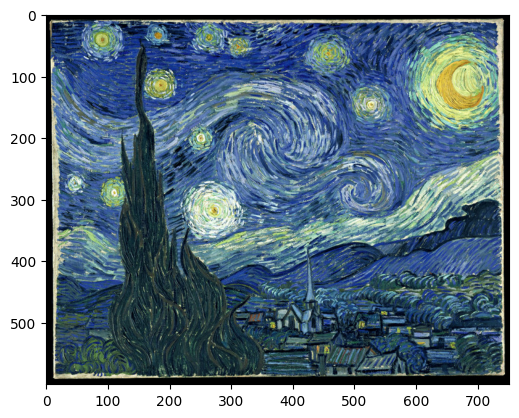

In [11]:
# Read with `cv2.imread()` & display with `matplotlib.pyplot.imshow()`
import matplotlib.pyplot as plt

image = cv2.imread("/home/yungshun317/workspace/py/torch-cv/data/starry_night.jpg")

# `matplotlib.pyplot.imshow()`
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# `matplotlib.pyplot.savefig()`
plt.savefig('outputs/starry_night.png')
plt.show()

In [13]:
# Read with `PIL.Image.open()` & display with `PIL.Image.open()` 
from PIL import Image

# `PIL.Image.open()`
image = Image.open(r"/home/yungshun317/workspace/py/torch-cv/data/starry_night.jpg")

# Show the image in any image viewer 
image.show()

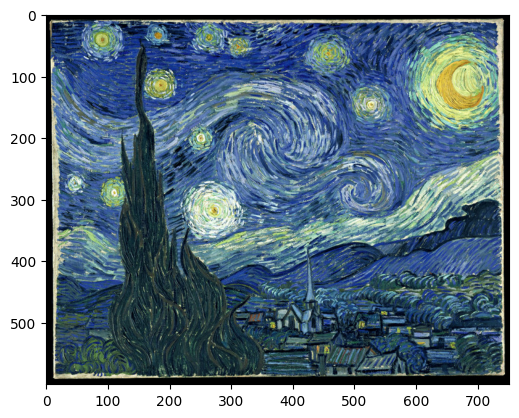

In [15]:
# Read with `PIL.Image.open()` & display with `matplotlib.pyplot.imshow()` 
from PIL import Image

# `PIL.Image.open()`
image = Image.open(r"/home/yungshun317/workspace/py/torch-cv/data/starry_night.jpg")

# `matplotlib.pyplot.imshow()`
plt.imshow(image)
# `matplotlib.pyplot.savefig()`
plt.savefig('outputs/starry_night.png')
plt.show()

## 1-2. Drawing
1. `cv2.line(img, pt1, pt2, color, thickness, lineType, shift)`: The function draws the line segment between `pt1` & `pt2` points in the image.
2. `cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift)`: Draws a rectangle outline or a filled rectangle whose two opposite corners are `pt1` & `pt2`.
3. `cv2.circle(img, center, radius, color, thickness, lineType, shift)`: Draws a simple or filled circle with a given `center` & `radius`. `shift` means the number of fractional bits in the coordinates of the center & in the radius value.
4. `cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=1, lineType=cv2.LINE_8, shift=0)`: Can draw an ellipse outline, a filled ellipse, an elliptic arc, or a filled ellipse sector.
5. `cv2.polylines(img, pts, isClosed, color, thickness, lineType, shift)`: Draws several polygonal curves.
6. `cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType, bottomLeftOrigin)`: Renders the specified text string in the image. Symbols that cannot be rendered using the are replaced by question marks. The `org` argument indicates the coordinates of the bottom-left corner of the text.

In [46]:
# Line
import numpy as np
import cv2
 
# Create a black image
image = np.zeros((512, 512, 3), np.uint8)
 
# Draw a diagonal blue line with thickness of 5px
cv2.line(img=image, pt1=(0, 0), pt2=(511, 511), color=(255, 0, 0), thickness=5)

cv2.imwrite("outputs/line.png", image)

True

In [47]:
# Rectangle
image = np.zeros((512, 512, 3), np.uint8)

cv2.rectangle(img=image, pt1=(384, 0), pt2=(510, 128), color=(0, 255, 0), thickness=3)

cv2.imwrite("outputs/rectangle.png", image)

True

In [48]:
# Circle
image = np.zeros((512, 512, 3), np.uint8)

cv2.circle(img=image, center=(447, 63), radius=63, color=(0, 0, 255), thickness=-1)

cv2.imwrite("outputs/circle.png", image)

True

In [52]:
# Ellipse
image = np.zeros((512, 512, 3), np.uint8)

cv2.ellipse(img=image, center=(256, 256), axes=(100, 50), angle=0, startAngle=0, endAngle=180, color=255, thickness=-1)

cv2.imwrite("outputs/ellipse.png", image)

True

In [50]:
# Polygon
image = np.zeros((512, 512, 3), np.uint8)

points = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
points = points.reshape((-1, 1, 2))
cv2.polylines(img=image, pts=[points], isClosed=True, color=(0, 255, 255))

cv2.imwrite("outputs/polygon.png", image)

True

In [51]:
# Text
image = np.zeros((512, 512, 3), np.uint8)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img=image, text='OpenCV', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

cv2.imwrite("outputs/text.png", image)

True

In [54]:
# Hershey fonts
font_faces = [i for i in dir(cv2) if "FONT_" in i]
print(font_faces)

['FONT_HERSHEY_COMPLEX', 'FONT_HERSHEY_COMPLEX_SMALL', 'FONT_HERSHEY_DUPLEX', 'FONT_HERSHEY_PLAIN', 'FONT_HERSHEY_SCRIPT_COMPLEX', 'FONT_HERSHEY_SCRIPT_SIMPLEX', 'FONT_HERSHEY_SIMPLEX', 'FONT_HERSHEY_TRIPLEX', 'FONT_ITALIC', 'QT_FONT_BLACK', 'QT_FONT_BOLD', 'QT_FONT_DEMIBOLD', 'QT_FONT_LIGHT', 'QT_FONT_NORMAL']


## 1-3. Paint Brush 
1. `setMouseCallback(winname, onMouse, userdata=0)`: Sets mouse handler for the specified window.

In [13]:
import cv2

events = [i for i in dir(cv2) if "EVENT" in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [57]:
# Mouse callback function
def draw_circle(event, x, y, flags, param):
    # Double click the left mouse button
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img=image, center=(x, y), radius=100, color=(255, 0, 0), thickness=-1)
 
# Create a black image, a window & bind the function to window
image = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

# Break when `ESC` is clicked
while(1):
    cv2.imshow('image', image)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [58]:
# Paint application
import numpy as np
import cv2 as cv

# `True` if mouse is pressed
drawing = False
# If `True`, draw rectangle. Press `m` to toggle to curve.
mode = True 
idx_x, idx_y = -1, -1
 
# Mouse callback function
def draw_circle(event, x, y, flags, param):
    global idx_x, idx_y, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        idx_x, idx_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img=image, pt1=(idx_x, idx_y), pt2=(x, y), color=(0, 255, 0), thickness=-1)
            else:
                cv2.circle(img=image, center=(x, y), radius=5, color=(0, 0, 255), thickness=-1) 
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img=image, pt1=(idx_x, idx_y), pt2=(x, y), color=(0, 255, 0), thickness=-1)
        else:
            cv2.circle(img=image, center=(x, y), radius=5, color=(0, 0, 255), thickness=-1)

image = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image', draw_circle)
 
while(1):
    cv2.imshow('image', image)
    # Leave only the last 8 bits of the original but this has been a redundant operation in newer OpenCV versions
    key = cv2.waitKey(1) & 0xFF
    # Switch mode
    if key == ord('m'):
        mode = not mode
    # `ESC`
    elif key == 27:
        break
 
cv.destroyAllWindows()

## 1-4. Color Palette
1. `cv2.createTrackbar(trackbarname, winname, value, count, onChange=0, userdata=0)`: Creates a trackbar & attaches it to the specified window. Note that this function takes no keyword arguments.
2. `cv2.getTrackbarPos(trackbarname, winname)`: Returns the trackbar position.

In [65]:
# `cv2.createTrackbar()` & `cv2.getTrackbarPos()`
import numpy as np
import cv2 as cv
 
def nothing(x):
    pass
 
# Create a black image, a window
image = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')
 
# Create trackbars for color change & note that `cv2.createTrackbar()` takes no keyword arguments
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)
 
# Create switch for `ON` or `OFF` functionality
switch = '0: OFF, 1 :ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)
 
while(1):
    cv2.imshow('image', image)
    key = cv.waitKey(1) & 0xFF
    if key == 27:
        break
 
    # Get current positions of four trackbars
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    switch_value = cv2.getTrackbarPos(switch, 'image')
 
    if switch_value == 0:
        image[:] = 0
    else:
        image[:] = [b, g, r]
 
cv.destroyAllWindows()

## 1-5. Capture Videos from Cameras
1. `cv2.VideoCapture(filename)`: Open video file, image file sequence, a capturing device, or a IP video stream for video capturing.
    - `isOpened()`: Returns true if video capturing has been initialized already. 
    - `read()`: Combines `grab()` & `retrieve()`. Grabs, decodes & returns the next video frame. If no frame has been grabbed, the method returns `False` & empty image.
    - `release()`: Closes video file or capturing device.

In [66]:
# Camera
import numpy as np
import cv2

# `cv2.VideoCapture()`
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot Open Camera")
    exit()
    
while True:
    # Capture frame by frame
    ret, frame = cap.read()
 
    # if frame is read correctly `ret` is `True`
    if not ret:
        print("Can't Receive Frame (Stream End?). Exiting...")
        break
        
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv2.imshow('frame', gray)

    # Press `q` to end
    if cv2.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

[ WARN:0@7717.897] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


## 1-6. Play Videos from Files

In [67]:
# File
import numpy as np
import cv2
 
cap = cv2.VideoCapture('data/vtest.avi')
 
while cap.isOpened():
    ret, frame = cap.read()
 
    # If frame is read correctly `ret` is `True`
    if not ret:
        print("Can't Receive Frame (Stream End?). Exiting...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame', gray)
    # Wait for 1 second
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv.destroyAllWindows()

Can't Receive Frame (Stream End?). Exiting...


## 1-7. Write Videos
1. `cv2.VideoWriter(filename, fourcc, fps, frameSize, isColor=True)`: `fourcc` is the 4-character code of codec used to compress the frames. For example, `cv2.VideoWriter_fourcc("M", "J", "P", "G")` is a motion-jpeg codec.

In [1]:
# Save
import numpy as np
import cv2
 
cap = cv2.VideoCapture(0)
 
# Define the codec & create `VideoWriter` object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(filename='outputs/output.avi', fourcc=fourcc, fps=20.0, frameSize=(640,  480))
 
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Can't Receive Frame (Stream End?). Exiting...")
        break

    # Write the flipped frame
    frame = cv2.flip(frame, 0)
    out.write(frame)
 
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

[ WARN:0@0.297] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


# 2. Image Processing
## 2-1. Pixels

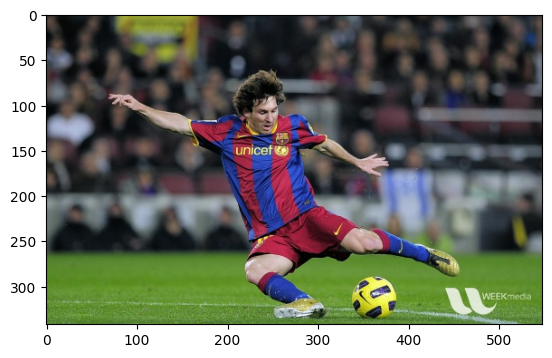

Pixel: [157 166 200]


In [17]:
# Access pixel values
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
image = cv2.imread('data/messi5.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

px = image[100, 100]
print("Pixel:", px)

In [21]:
blue = image[100, 100, 0]
print("Blue Value:", blue)

Blue Value: 255


In [20]:
# Modify pixel values
image[100, 100] = [255, 255, 255]
print("New Pixel Value:", image[100, 100])

New Pixel Value: [255 255 255]


## 2-2. Image Properties

In [22]:
# Image Properties
print("Image Shape:", image.shape)

Image Shape: (342, 548, 3)


In [23]:
# 342 * 548 * 3 = 187416 * 3 =  562248
print("Image Size:", image.size)

Image Size: 562248


In [24]:
print("Image Data Type:", image.dtype)

Image Data Type: uint8


## 2-3. Region of Images (ROI)

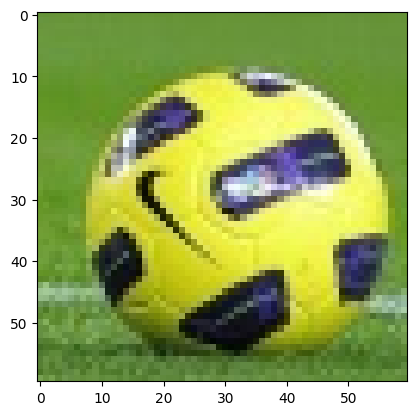

In [35]:
# ROI
image = cv2.imread('data/messi5.jpg')
ball = image[280:340, 330:390]
image[273:333, 100:160] = ball

plt.imshow(cv2.cvtColor(ball, cv2.COLOR_BGR2RGB))
plt.show()

## 2-4. Channels

In [36]:
# Channels
image = cv2.imread('data/messi5.jpg')
b, g, r = cv2.split(image)
image = cv2.merge((b, g, r))

print("Blue Channel Shape:", b.shape)
print("Green Channel Shape:", g.shape)
print("Red Channel Shape:", r.shape)

Blue Channel Shape: (342, 548)
Green Channel Shape: (342, 548)
Red Channel Shape: (342, 548)


In [37]:
# Select blue channel
b = image[:, :, 0]

print("Blue Channel Shape:", b.shape)

Blue Channel Shape: (342, 548)


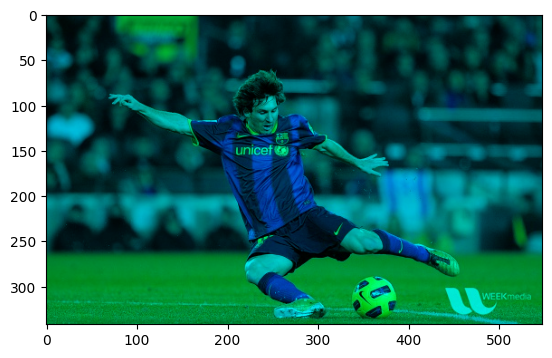

In [41]:
# Drop red color
image = cv2.imread('data/messi5.jpg')
image[:, :, 2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 2-5. Borders
1. `cv2.copyMakeBorder(src, top, bottom, left, right, borderType, dst, value)`: Forms a border around an image. `dst` means a destination image of the same type as `src` & the size. `value` is the border value if `borderType=cv2.BORDER_CONSTANT`.

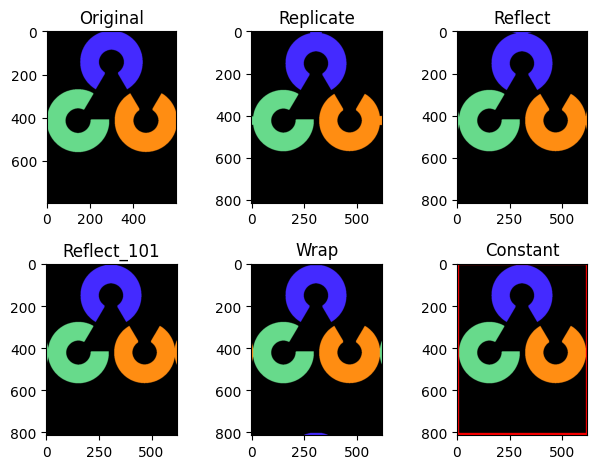

In [47]:
# Borders
import cv2
import numpy as np
from matplotlib import pyplot as plt

# (B, G, R) in OpenCV but display in (R, G, B) by `matplotlib.pyplot` later
blue = [255, 0, 0]
 
image = cv2.imread('data/opencv-logo.png')
assert image is not None, "File could not be Read, Check with os.path.exists() please."
 
replicate = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=blue)

# `cmap='gray'` will be ignored if the input has 3 channels
plt.subplot(231), plt.imshow(image, 'gray'), plt.title('Original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('Replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('Reflect')
plt.subplot(234), plt.imshow(reflect_101, 'gray'), plt.title('Reflect_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('Wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('Constant')

plt.tight_layout()
plt.show()

## 2-6. Arithmetic Operations

### 2-6-1. Image Addition
OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [57]:
# `numpy.uint8()` represents images with 3 color channels
x = np.uint8([250])
y = np.uint8([10])

# 250 + 10 = 255
print("After OpenCV Addition:")
print(cv2.add(x, y))

After OpenCV Addition:
[[260.]
 [  0.]
 [  0.]
 [  0.]]


In [58]:
# 250 + 10 = 260 % 256 = 4
print("After NumPy Addition:", x + y) 

After NumPy Addition: [4]


### 2-6-2. Image Blending
1. `cv2.addWeighted(src1, alpha, src2, beta, gamma, dst, dtype)`: Calculates the weighted sum of two arrays as $dst(I) = saturate(src1(I)*alpha+src2(I)*beta+gamma)$ where $I$ is a multi-dimensional index of array elements.

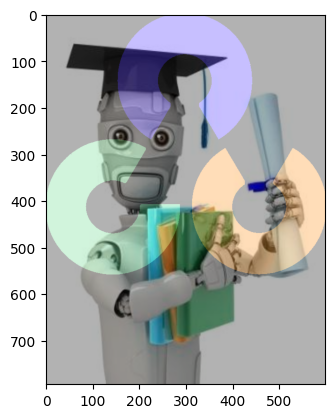

In [65]:
# Image blending
image_1 = cv2.imread('data/ml.png')
image_2 = cv2.imread('data/opencv-logo.png')
assert image_1 is not None, "File could not be Read, Check with os.path.exists() please."
assert image_2 is not None, "File could not be Read, Check with os.path.exists() please."

# Size matching
image_1 = cv2.resize(image_1, (image_2.shape[1], image_2.shape[0]))
dst = cv2.addWeighted(image_1, 0.7, image_2, 0.3, 0)

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(dst)
plt.show()

### 2-6-3. Bitwise Operations
1. `cv2.bitwise_and(src1, src2, dst, mask)`: Calculates the per-element bit-wise conjunction of two arrays or an array & a scalar. `dst = src1 & src2`. $dst(I)=src1(I) \wedge src2(I)\ if\ mask(I) \neq 0$. 

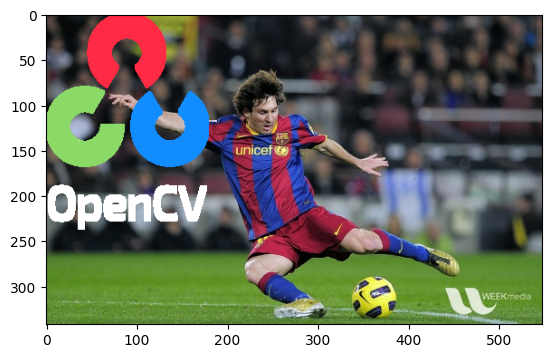

In [84]:
# Bitwise operations
# Load two images
image_1 = cv2.imread('data/messi5.jpg')
image_2 = cv2.imread('data/opencv-logo-white.png')
assert image_1 is not None, "File could not be Read, Check with os.path.exists() please."
assert image_2 is not None, "File could not be Read, Check with os.path.exists() please."
 
# In order to put logo on top-left corner, create a ROI
rows, cols, channels = image_2.shape
roi = image_1[0:rows, 0:cols]
 
# Create a mask of logo & its inverse mask
grayscale_image = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(grayscale_image, 10, 255, cv2.THRESH_BINARY)
inverse_mask = cv2.bitwise_not(mask)
 
# Black out the area of logo in ROI
image_1_background = cv2.bitwise_and(roi, roi, mask=inverse_mask)
 
# Take only region of logo from logo image
image_2_logo = cv2.bitwise_and(image_2, image_2, mask=mask)
 
# Put logo in ROI and modify the main image
dst = cv2.add(image_1_background, image_2_logo)
image_1[0:rows, 0:cols] = dst

# cv2.imshow('Result', image_1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.show()

## 2-7. Color Spaces
1. `cv2.cvtColor(src, dst, code, dstCn=0, hint=cv2.ALGO_HINT_DEFAULT)`: Converts an image from one color space to another.
    - `hint`
        - `cv2.ALGO_HINT_DEFAULT`
        - `cv2.ALGO_HINT_ACCURATE`
        - `cv2.ALGO_HINT_APPROX`
3. `cv2.inRange(src, lowerb, upperb, dst)`: Checks if array elements lie between the elements of 2 other arrays.

In [21]:
import cv2

flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

### 2-7-1. Object Tracking
1. `cv2.inRange(src, lowerb, upperb, dst)`: Checks if array elements lie between the elements of two other arrays. Can be used to perform basic thresholding operations. Takes $2$ channels for example, $dst(I)=lowerb(I)_{0}\le src(I)_{0} \le upperb(I)_{0}\wedge lowerb(I)_{1} \le src(I)_{1} \le upperb(I)_{1}$.


Green Color to HSV: [[[ 60 255 255]]]


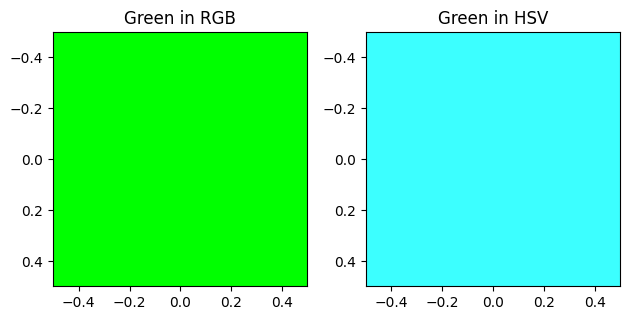

In [83]:
# Object tracking
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print("Green Color to HSV:", hsv_green)

plt.subplot(121), plt.imshow(green), plt.title('Green in RGB')
plt.subplot(122), plt.imshow(hsv_green), plt.title('Green in HSV')
plt.tight_layout()
plt.show()

In [3]:
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
 
while(1):
    # Take each frame
    _, frame = cap.read()
 
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    # Define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
 
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
 
    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the webcam
    cv2.imshow('Frame', frame)
    cv2.imshow('Mask', mask)
    cv2.imshow('Result', result)

    # Wait or break
    key = cv2.waitKey(5) & 0xFF
    if key == 27:
        break
 
cv2.destroyAllWindows()

[ WARN:0@37.527] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


## 2-8. Geometric Transformations
### 2-8-1. Scaling
1. `cv2.resize(src, dsize, dst, fx, fy, interpolation)`: Resizes the image `src` down to or up to the specified size. `fx` & `fy` are the scale factors along the horizontal & vertical axes respectively.
    - [Interpolation Flags](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

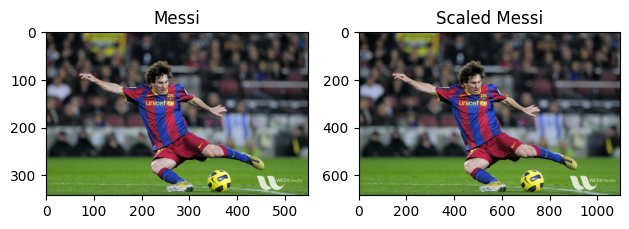

In [6]:
# Scaling
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
image = cv2.imread('data/messi5.jpg')
assert image is not None, "File could not be Read, Check with os.path.exists() please."
 
result = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
 
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Messi')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Scaled Messi')
plt.tight_layout()
plt.show()

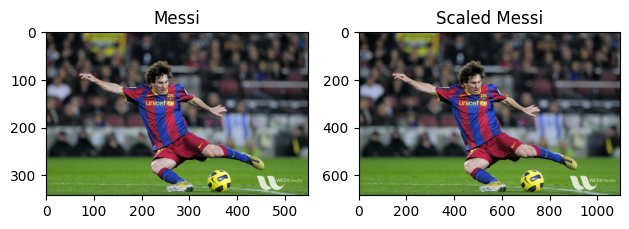

In [9]:
image = cv2.imread('data/messi5.jpg')
assert image is not None, "File could not be Read, Check with os.path.exists() please."

height, width = image.shape[:2]
result = cv2.resize(image, (2 * width, 2 * height), interpolation=cv2.INTER_CUBIC)

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Messi')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Scaled Messi')
plt.tight_layout()
plt.show()

### 2-8-2. Translation

In [ ]:
# Translation
import numpy as np
import cv2 as cv
 
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None, "File could not be Read, Check with os.path.exists() please."
rows,cols = img.shape
 
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
 
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### 2-8-3. Rotation

In [ ]:
# Rotation
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None, "File could not be Read, Check with os.path.exists() please."
rows,cols = img.shape
 
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

### 2-8-4. Affine Transformation

In [ ]:
# Affine Transformation
img = cv.imread('drawing.png')
assert image is not None, "File could not be Read, Check with os.path.exists() please."
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
dst = cv.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 2-8-5. Perspective Transformation

In [ ]:
# Perspective Transformation
img = cv.imread('sudoku.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
dst = cv.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 2-9. Image Thresholding
### 2-9-1. Simple Thresholding

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

### 2-9-2. Adaptive Thresholding

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 2-9-3. Otsu's Binarization

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv.imread('noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.GaussianBlur(img,(5,5),0)
 
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
 
bins = np.arange(256)
 
fn_min = np.inf
thresh = -1
 
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
 
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
 
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
 
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

## 2-10. Image Filtering

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('opencv_logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 2-11. Image Smoothing
### 2-11-1. Averaging

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('opencv-logo-white.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
blur = cv.blur(img,(5,5))
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2-11-2. Gaussian Blurring

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)

### 2-11-3. Median Blurring

In [ ]:
median = cv.medianBlur(img,5)

### 2-11-4. Bilateral Filtering

In [ ]:
blur = cv.bilateralFilter(img,9,75,75)

## 2-12. Morphological Transformations
### 2-12-1. Erosion

In [ ]:
import cv2 as cv
import numpy as np
 
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

### 2-12-2. Dilation

In [ ]:
dilation = cv.dilate(img,kernel,iterations = 1)

### 2-12-3. Opening

In [ ]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

### 2-12-4. Closing

In [ ]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

### 2-12-5. Morphological Gradient

In [ ]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

### 2-12-6. Top Hat

In [ ]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

### 2-12-7. Black Hat

In [ ]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

### 2-12-8. Structuring Elements
1. `cv2.getStructuringElement(shape, ksize, anchor=Point(-1,-1))`: Returns a structuring element of the specified size and shape for morphological operations.

In [ ]:
# Rectangular Kernel
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)
 
# Elliptical Kernel
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)
 
# Cross-shaped Kernel
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## 2-13. Image Gradients
OpenCV provides three types of gradient filters or High-pass filters.
1. `cv2.Sobel(src, dst, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)`
2. `cv2.Scharr(src, dst, ddepth, dx, dy, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)`
3. `cv2.Laplacian(src, dst, ddepth, ksize=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)`

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('dave.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
laplacian = cv.Laplacian(img,ddepth=cv.CV_64F)
sobelx = cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=5)
sobely = cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
 
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
 
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
 
plt.show()

## 2-14. Canny Edge Detection
1. `cv2.Canny(image, threshold1, threshold2, edges, apertureSize=3, L2gradient=False)`: Finds edges in the input image and marks them in the output map edges using the Canny algorithm. The smaller value between `threshold1` and `threshold2` is used for edge linking; the larger one is used to find initial segments of strong edges.
2. `cv2.Canny(dx, dy, threshold1, threshold2, edges, L2gradient=False)`: Overloaded member function. `dx` & `dy` indicates $16$-bit $x$ & $y$ derivative of input image respectively. 

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

## 2-15. Image Pyramids
1. `cv.pyrUp()`
2. `cv.pyrDown()`

In [ ]:
img = cv.imread('messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
lower_reso = cv.pyrDown(higher_reso)

In [ ]:
higher_reso2 = cv.pyrUp(lower_reso)

In [ ]:
# Image blending using pyramids
import cv2 as cv
import numpy as np,sys
 
A = cv.imread('apple.jpg')
B = cv.imread('orange.jpg')
assert A is not None, "file could not be read, check with os.path.exists()"
assert B is not None, "file could not be read, check with os.path.exists()"
 
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
 
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
 
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
 
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
 
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
 
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
 
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
 
cv.imwrite('Pyramid_blending2.jpg',ls_)
cv.imwrite('Direct_blending.jpg',real)

## 2-16. Contours
### 2-16-1. Find & Draw Contours
1. `cv2.findContours()`
   - `mode`: Contour retrieval mode.
       - `cv2.RETR_LIST`
       - `cv2.RETR_TREE`
       - `cv2.RETR_CCOMP`
       - `cv2.RETR_EXTERNAL`
3. `cv2.drawContours()`

In [ ]:
import numpy as np
import cv2 as cv
 
im = cv.imread('test.jpg')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
cv.drawContours(img, contours, -1, (0,255,0), 3)

In [ ]:
cv.drawContours(img, contours, 3, (0,255,0), 3)

In [ ]:
cnt = contours[4]
cv.drawContours(img, [cnt], 0, (0,255,0), 3)

### 2-16-2. Contour Features

In [ ]:
import numpy as np
import cv2 as cv
 
img = cv.imread('star.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
 
cnt = contours[0]
M = cv.moments(cnt)
print( M )

In [ ]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [ ]:
area = cv.contourArea(cnt)

In [ ]:
perimeter = cv.arcLength(cnt,True)

In [ ]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [ ]:
hull = cv.convexHull(points[, hull[, clockwise[, returnPoints]]])

In [ ]:
hull = cv.convexHull(cnt)

In [ ]:
k = cv.isContourConvex(cnt)

In [ ]:
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

In [ ]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(0,255,0),2)

In [ ]:
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(0,255,0),2)

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

### 2-16-3. Contour Properties

In [ ]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h

In [ ]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

In [ ]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area

In [ ]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [ ]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)

In [ ]:
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)

In [ ]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)

In [ ]:
mean_val = cv.mean(im,mask = mask)

In [ ]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

### 2-16-4. Convexity Defects

In [ ]:
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

In [ ]:
import cv2 as cv
import numpy as np
 
img = cv.imread('star.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
 
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
 
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)
 
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

### 2-16-5. Point Polygon Test

In [ ]:
dist = cv.pointPolygonTest(cnt,(50,50),True)

### 2-16-6. Shape Matching

In [ ]:
import cv2 as cv
import numpy as np
 
img1 = cv.imread('star.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('star2.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
 
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
 
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )

## 2-17. Histograms
### 2-17-1. Histogram Calculation

In [ ]:
# OpenCV
img = cv.imread('home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist = cv.calcHist([img],[0],None,[256],[0,256])

In [ ]:
# NumPy
hist,bins = np.histogram(img.ravel(),256,[0,256])

### 2-17-2. Plot Histograms with Matplotlib

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 2-17-3. Masking

In [ ]:
# Mask
img = cv.imread('home.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

### 2-17-4. Histogram Equalization
**CLAHE (Contrast Limited Adaptive Histogram Equalization)**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
img2 = cdf[img]

In [ ]:
img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

In [ ]:
import numpy as np
import cv2 as cv
 
img = cv.imread('tsukuba_l.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
 
cv.imwrite('clahe_2.jpg',cl1)

### 2-17-5. 2D Histograms

In [ ]:
# OpenCV
import numpy as np
import cv2 as cv
 
img = cv.imread('home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
 
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

In [ ]:
# NumPy
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
 
hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

In [ ]:
# Plot
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('home.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
 
plt.imshow(hist,interpolation = 'nearest')
plt.show()

### 2-17-6. Histogram Backprojection

In [ ]:
# NumPy
import numpy as np
import cv2 as cvfrom matplotlib import pyplot as plt
 
#roi is the object or region of object we need to find
roi = cv.imread('rose_red.png')
assert roi is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
 
#target is the image we search in
target = cv.imread('rose.png')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
 
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [ ]:
h,s,v = cv.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

In [ ]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)

In [ ]:
ret,thresh = cv.threshold(B,50,255,0)

In [ ]:
# OpenCV
import numpy as np
import cv2 as cv
 
roi = cv.imread('rose_red.png')
assert roi is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
 
target = cv.imread('rose.png')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
 
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
 
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
 
# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
 
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)
 
res = np.vstack((target,thresh,res))
cv.imwrite('res.jpg',res)

## 2-18. Image Transforms
- [Image Transforms](https://www.mathworks.com/help/images/image-transforms.html)

### 2-18-1. Fourier Transform

In [ ]:
# NumPy
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
 
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [ ]:
# OpenCV
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
 
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
 
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Performance Optimization of DFT
In [15]: img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
In [16]: assert img is not None, "file could not be read, check with os.path.exists()"
In [17]: rows,cols = img.shape
In [18]: print("{} {}".format(rows,cols))
342 548
 
In [19]: nrows = cv.getOptimalDFTSize(rows)
In [20]: ncols = cv.getOptimalDFTSize(cols)
In [21]: print("{} {}".format(nrows,ncols))
360 576

In [ ]:
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

In [ ]:
right = ncols - cols
bottom = nrows - rows
bordertype = cv.BORDER_CONSTANT #just to avoid line breakup in PDF file
nimg = cv.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)

In [ ]:
In [22]: %timeit fft1 = np.fft.fft2(img)
10 loops, best of 3: 40.9 ms per loop
In [23]: %timeit fft2 = np.fft.fft2(img,[nrows,ncols])
100 loops, best of 3: 10.4 ms per loop

In [ ]:
In [24]: %timeit dft1= cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)
100 loops, best of 3: 13.5 ms per loop
In [27]: %timeit dft2= cv.dft(np.float32(nimg),flags=cv.DFT_COMPLEX_OUTPUT)
100 loops, best of 3: 3.11 ms per loop

In [ ]:
# Why Laplacian is a High Pass Filter?
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
 
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
 
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
 
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
 
plt.show()

### 2-18-2. Hough Transform

In [ ]:
# Hough line transform
import cv2 as cv
import numpy as np
 
img = cv.imread(cv.samples.findFile('sudoku.png'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
 
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
 
cv.imwrite('houghlines3.jpg',img)

In [ ]:
import cv2 as cv
import numpy as np
 
img = cv.imread(cv.samples.findFile('sudoku.png'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
 
cv.imwrite('houghlines5.jpg',img)

In [ ]:
# Hough circle transform
import numpy as np
import cv2 as cv
 
img = cv.imread('opencv-logo-white.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
 
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
 
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

## 2-19. Template Matching
1. `cv2.matchTemplate()`
2. `cv2.minMaxLoc()`

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img_rgb = cv.imread('mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
 
cv.imwrite('res.png',img_rgb)

## 2-20. Image Segmentation

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('coins.png')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

## 2-21. Interactive Foreground Extraction

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img.shape[:2],np.uint8)
 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
 
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
 
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
 
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
# newmask is the mask image I manually labelled
newmask = cv.imread('newmask.png', cv.IMREAD_GRAYSCALE)
assert newmask is not None, "file could not be read, check with os.path.exists()"
 
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
 
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
 
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

# 3. Feature Detection & Description
## 3-1. Corner Detection
### 3-1-1. Harris Corner Detector

In [ ]:
import numpy as np
import cv2 as cv
filename = 'chessboard.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv
filename = 'chessboard2.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)

### 3-1-2. Shi-Tomasi Corner Detector

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('blox.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

### 3-1-3. SIFT (Scale-Invariant Feature Transform)

### 3-1-4. SURF (Speeded-Up Robust Features)

### 3-1-5. FAST

## 3-2. Feature Matching
### 3-2-1. Brute Force Matcher
### 3-2-2. FLANN Based Matcher
## 3-3. Homography

# 4. Video Analysis

# 5. Camera Calibration & 3D Reconstruction

# 6. Computational Photography

# 7. Object Detection